In [1]:
%load_ext autoreload
%autoreload 2

from shared.reaction_class import returnReactionTemplates, VirtualFlask

mechs = returnReactionTemplates()

In [2]:
from rdkit import Chem


famous_mcrs = [
    "NC1=CC=C(C)C=C1.O=CC2=CC=CC=C2.O=C(C3=CC=CC=C3)C",
    # "[C-]#[N+]CCC1=CC=CC=C1.NC(C)C2=CC=C(OC)C=C2.[O-]C(C(CC)C)=O.O=CCCC(OC)=O",
    # "O=C(CC(OCC)=O)C.NC(N)=O.O=CC1=CC=CC=C1",
    "O=CC1=CC=CC=C1.NC2=CC=CC=C2.C3=CC=CC3",
    "NC1=CC=CC=C1.O=CC2=CC=CC=C2.O=P(OC)OC",
    "OC(C1=CC=CC=C1)=O.O=CC2=CC=CO2.[C-]#[N+]CCCC",
    "O=CC(OCC)=O.OB(O)C1=CC=CC=C1.C2CCCN2",
    "NCCC1=CC=CC=C1.O=C/C=C/C2=CC=CC=C2.[C-]#N",
    "C#CC1=CC=CC=C1.O=CC2CCCCC2.C3CCCCN3"
]

famous_mcr_products = [Chem.CanonSmiles(x) for x in [
    "O=C(C1=CC=CC=C1)CC(NC2=CC=C(C)C=C2)C3=CC=CC=C3",
    # "O=C(C(N(C(C(C)CC)=O)C(C1=CC=C(OC)C=C1)C)CCC(OC)=O)NCCC2=CC=CC=C2",
    # "O=C(N1)NC(C)=C(C(OCC)=O)C1C2=CC=CC=C2",
    "C12=C(NC(C3=CC=CC=C3)C4C2C=CC4)C=CC=C1",
    "O=P(C(C1=CC=CC=C1)NC2=CC=CC=C2)(OC)OC",
    "O=C(C1=CC=CC=C1)OC(C(NCCCC)=O)C2=CC=CO2",
    "O=C(OCC)C(N1CCCC1)C2=CC=CC=C2",
    "N#CC(C=CC1=CC=CC=C1)NCCC2=CC=CC=C2",
    # "N#CC(/C=C/C1=CC=CC=C1)=N\CCC2=CC=CC=C2",
    "C1(C#CC(N2CCCCC2)C3CCCCC3)=CC=CC=C1"
]]

# iters = [5, 11, 11, 5, 5, 7, 5, 11, 9]
iters = [5, 5, 5, 5, 4, 5, 5]

In [4]:
networks = []
paths = []
for idx,i in enumerate(famous_mcrs):

    state_network = VirtualFlask(mechs)
    state_network.charge(i.split("."), [])
    state_network.run_until_done(iters=iters[idx], thresh=1500000, ring_filter=False, precalc_prods=[])

    for node in state_network.nodes:
        sm = Chem.MolToSmiles(Chem.MolFromSmiles(node), isomericSmiles=False)
        # if idx == 5:
            # print(sm)
        if famous_mcr_products[idx] in sm:
            print(idx, state_network.nodes[node].propagations)
            networks.append(state_network)
            paths.append(state_network.get_path_from_init_to_node(node))
            break


0.7327806949615479 232
0 5
0.3339817523956299 131
1 4
0.6860058307647705 276
2 4
0.4860212802886963 203
3 3
1.7170391082763672 796
4 4
0.5965988636016846 257
5 4
0.10962104797363281 44
6 5


['CC(=O)c1ccccc1.Cc1ccc(N)cc1.O=Cc1ccccc1', 'C=C([O-])c1ccccc1.Cc1ccc(N)cc1.O=Cc1ccccc1', 'C=C([O-])c1ccccc1.Cc1ccc(NC(O)c2ccccc2)cc1', 'C=C([O-])c1ccccc1.Cc1ccc(NC([OH2+])c2ccccc2)cc1', 'C=C([O-])c1ccccc1.Cc1ccc([NH+]=Cc2ccccc2)cc1.O', 'Cc1ccc(NC(CC(=O)c2ccccc2)c2ccccc2)cc1.O']
['C1=CCC=C1.Nc1ccccc1.O=Cc1ccccc1', 'C1=CCC=C1.OC(Nc1ccccc1)c1ccccc1', 'C1=CCC=C1.[OH2+]C(Nc1ccccc1)c1ccccc1', 'C(=[NH+]c1ccccc1)c1ccccc1.C1=CCC=C1.O', 'C1=CC2c3ccccc3NC(c3ccccc3)C2C1.O']
['CO[PH](=O)OC.Nc1ccccc1.O=Cc1ccccc1', 'CO[PH](=O)OC.OC(Nc1ccccc1)c1ccccc1', 'CO[PH](=O)OC.[OH2+]C(Nc1ccccc1)c1ccccc1', 'C(=[NH+]c1ccccc1)c1ccccc1.CO[PH](=O)OC.O', 'COP(=O)(OC)C(Nc1ccccc1)c1ccccc1.O']
['O=C(O)c1ccccc1.O=Cc1ccco1.[C-]#[N+]CCCC', 'O=C(O[O+]=Cc1ccco1)c1ccccc1.[C-]#[N+]CCCC', 'CCCCN=C(OC(=O)c1ccccc1)C(O)c1ccco1', 'CCCCNC(=O)C(OC(=O)c1ccccc1)c1ccco1']
['C1CCNC1.CCOC(=O)C=O.OB(O)c1ccccc1', 'CCOC(=O)C(O)N1CCCC1.OB(O)c1ccccc1', 'CCOC(=O)C([OH+][B-](O)(O)c1ccccc1)N1CCCC1', 'CCOC(=O)C=[N+]1CCCC1.O[B-](O)(O)c1ccccc1', 'C

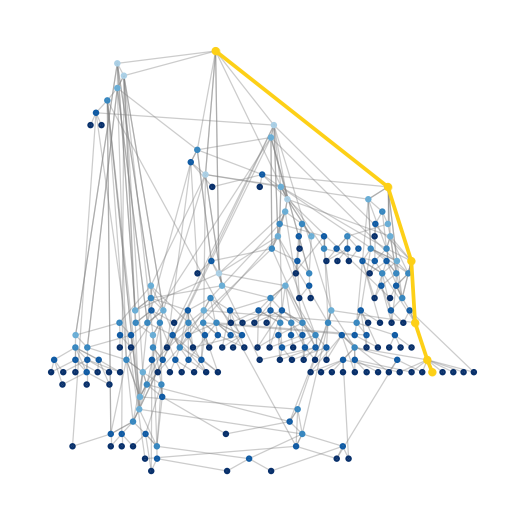

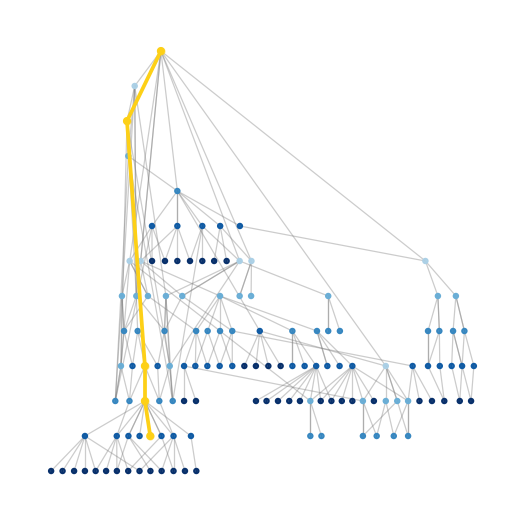

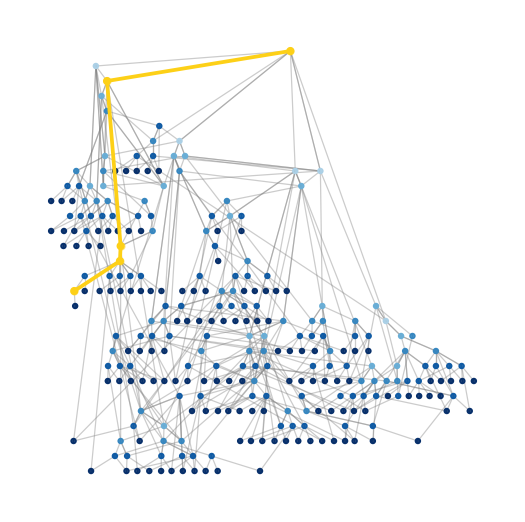

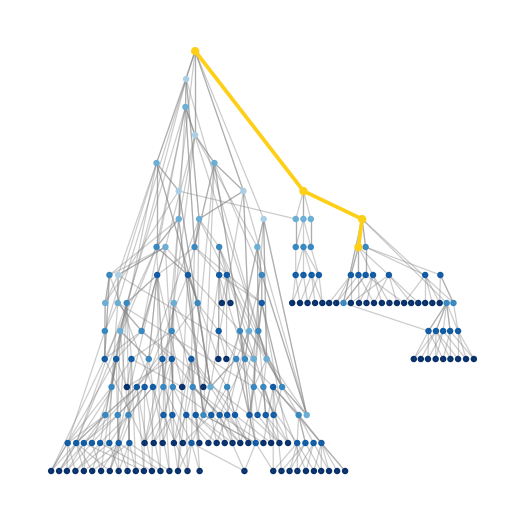

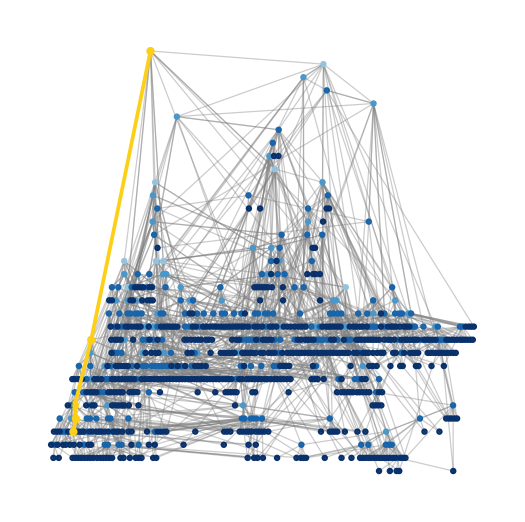

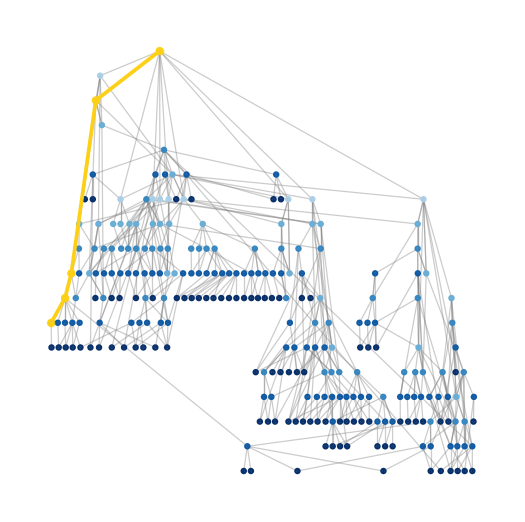

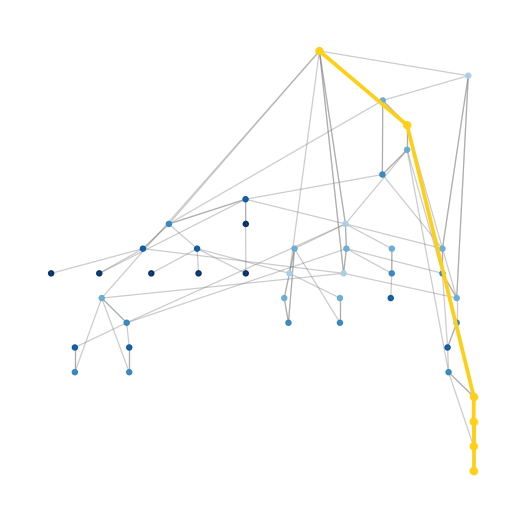

In [23]:
nets = ["a", "b", "c", "d", "e", "f", "g"]

for idx, i in enumerate(networks):
    print(paths[idx])
    i.draw_hypergraph_single_color(
        sub=i.nx, name=f"figure2-{nets[idx]}", text=False, fig_size=(2, 2), node_size=0.3,
        highlight=paths[idx],
        highlight_color="#FDD017",
        highlight_scale=3,
        try_rooting=False
    )

In [32]:
from rdkit import Chem

patt = Chem.MolFromSmarts("[N,P&X3;+0:5]")

mol = Chem.MolFromSmiles("O=P(OC)OC")
# mol = Chem.MolFromSmiles("COPOC")

print(mol.HasSubstructMatch(patt))

False
